In [1]:
import pyforest

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/portfolio_data.csv")

<IPython.core.display.Javascript object>

In [3]:
data

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
...,...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010


In [36]:
x = data.sample(frac = 0.8)
y = data.drop(x.index)

In [37]:
x

,Date,AMZN,DPZ,BTC,NFLX
1165,12/13/2017,1164.130005,178.038895,16286.820310,187.860001
513,5/14/2015,432.279999,105.580681,237.199997,83.835716
254,5/5/2014,310.049988,68.786476,432.190002,49.197144
965,3/1/2017,853.080017,183.563782,1222.660034,142.649994
937,1/19/2017,809.039978,162.597656,895.210022,138.410004
...,...,...,...,...,...
1146,11/15/2017,1126.689941,173.353912,7283.220215,192.119995
1511,5/2/2019,1900.819946,274.320007,5753.379883,379.059998
126,10/29/2013,362.700012,64.459106,216.000000,46.757141
1068,7/27/2017,1046.000000,179.493607,2806.750000,182.679993


In [38]:
y

,Date,AMZN,DPZ,BTC,NFLX
11,5/16/2013,264.119995,53.364532,123.500000,33.861427
12,5/17/2013,269.899994,53.936020,123.209999,34.142857
14,5/21/2013,268.859985,53.355167,123.800003,33.869999
16,5/23/2013,261.799988,55.472504,133.100006,32.311428
20,5/30/2013,266.829987,56.015888,128.820007,31.808571
...,...,...,...,...,...
1484,3/25/2019,1774.260010,242.559998,3924.550049,366.230011
1486,3/27/2019,1765.699951,247.580002,4045.979980,353.369995
1491,4/3/2019,1820.699951,253.110001,4913.359863,369.750000
1502,4/18/2019,1861.689941,267.609985,5295.529785,360.350006


In [39]:
train = x.iloc[:,1:].values

In [40]:
train

array([[ 1164.130005,   178.038895, 16286.82031 ,   187.860001],
       [  432.279999,   105.580681,   237.199997,    83.835716],
       [  310.049988,    68.786476,   432.190002,    49.197144],
       ...,
       [  362.700012,    64.459106,   216.      ,    46.757141],
       [ 1046.      ,   179.493607,  2806.75    ,   182.679993],
       [ 1608.      ,   247.720367,  9032.219727,   330.299988]])

In [10]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [11]:
sc = MinMaxScaler(feature_range=(0,1))

In [12]:
train_set_scaled = sc.fit_transform(train)

In [13]:
#creating a data structure with 60 timesteps and 1 output
x_train=[]
y_train=[]

In [15]:
for i in range(60, 1258):
    x_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])

In [16]:
x_train,y_train = np.array(x_train), np.array(y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

<IPython.core.display.Javascript object>

In [19]:
!pip install keras

In [21]:
!pip install Tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=b1d5142d6f5fc772ed0fad7ccb94448882c7a27d1ddf8931c044d92d8e11f4a2
  Stored in directory: c:\users\amith reddy\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [24]:
#Building RNN
#importing keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [25]:
#Initialising RNN
reg = Sequential()

In [26]:
#Adding first layer LSTM and some dropout reqularisation
reg.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
reg.add(Dropout(0.2))

In [29]:
#Adding Second layer LSTM and some dropout reqularisation
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

In [30]:
#Adding Third layer LSTM and some dropout reqularisation
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

In [31]:
#Adding Fourth layer LSTM and some dropout reqularisation
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

In [32]:
#Adding output layer
reg.add(Dense(units = 1))

In [34]:
#Compiling the RNN
reg.compile(optimizer = 'adam', loss='mean_squared_error')

In [35]:
#Fitting the RNN to training data
reg.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 25s 204ms/step - loss: 0.0121
Epoch 2/100
38/38 [==============================] - 8s 198ms/step - loss: 0.0019
Epoch 3/100
38/38 [==============================] - 8s 199ms/step - loss: 0.0022
Epoch 4/100
38/38 [==============================] - 8s 197ms/step - loss: 0.0018
Epoch 5/100
38/38 [==============================] - 8s 199ms/step - loss: 0.0016
Epoch 6/100
38/38 [==============================] - 8s 199ms/step - loss: 0.0017
Epoch 7/100
38/38 [==============================] - 8s 198ms/step - loss: 0.0015
Epoch 8/100
38/38 [==============================] - 8s 198ms/step - loss: 0.0015
Epoch 9/100
38/38 [==============================] - 8s 199ms/step - loss: 0.0015
Epoch 10/100
38/38 [==============================] - 8s 199ms/step - loss: 0.0015
Epoch 11/100
38/38 [==============================] - 8s 200ms/step - loss: 0.0013
Epoch 12/100
38/38 [==============================] - 8s 198ms/step - loss: 0.0011
Epoch 13/100

38/38 [==============================] - 8s 202ms/step - loss: 5.5774e-04
Epoch 97/100
38/38 [==============================] - 8s 204ms/step - loss: 5.5901e-04
Epoch 98/100
38/38 [==============================] - 8s 206ms/step - loss: 4.9231e-04
Epoch 99/100
38/38 [==============================] - 8s 206ms/step - loss: 4.9688e-04
Epoch 100/100
38/38 [==============================] - 8s 207ms/step - loss: 5.3896e-04


In [41]:
#making the predictions and visulization
test = y.iloc[:,1:].values

In [42]:
test

array([[ 264.119995,   53.364532,  123.5     ,   33.861427],
       [ 269.899994,   53.93602 ,  123.209999,   34.142857],
       [ 268.859985,   53.355167,  123.800003,   33.869999],
       ...,
       [1820.699951,  253.110001, 4913.359863,  369.75    ],
       [1861.689941,  267.609985, 5295.529785,  360.350006],
       [1917.77002 ,  283.149994, 6171.959961,  364.369995]])

In [50]:
dataset = pd.concat((x[['AMZN','DPZ','BTC','NFLX']],y[['AMZN','DPZ','BTC','NFLX']]),axis=0)

<IPython.core.display.Javascript object>

In [51]:
dataset

,AMZN,DPZ,BTC,NFLX
1165,1164.130005,178.038895,16286.820310,187.860001
513,432.279999,105.580681,237.199997,83.835716
254,310.049988,68.786476,432.190002,49.197144
965,853.080017,183.563782,1222.660034,142.649994
937,809.039978,162.597656,895.210022,138.410004
...,...,...,...,...
1484,1774.260010,242.559998,3924.550049,366.230011
1486,1765.699951,247.580002,4045.979980,353.369995
1491,1820.699951,253.110001,4913.359863,369.750000
1502,1861.689941,267.609985,5295.529785,360.350006


In [115]:
y1=y.iloc[:,1:]

In [116]:
inputs = dataset[len(dataset)-len(y1)-60:].values

In [117]:
inputs

array([[ 529.440002,  106.477127,  235.600006,   97.510002],
       [1696.199951,  266.751465, 3648.050049,  339.100006],
       [ 539.799988,  101.801483,  245.350006,  113.330002],
       ...,
       [1820.699951,  253.110001, 4913.359863,  369.75    ],
       [1861.689941,  267.609985, 5295.529785,  360.350006],
       [1917.77002 ,  283.149994, 6171.959961,  364.369995]])

In [118]:
#inputs = inputs.reshape(-1,1)

In [119]:
inputs

array([[ 529.440002,  106.477127,  235.600006,   97.510002],
       [1696.199951,  266.751465, 3648.050049,  339.100006],
       [ 539.799988,  101.801483,  245.350006,  113.330002],
       ...,
       [1820.699951,  253.110001, 4913.359863,  369.75    ],
       [1861.689941,  267.609985, 5295.529785,  360.350006],
       [1917.77002 ,  283.149994, 6171.959961,  364.369995]])

In [120]:
#inputs = sc.transform(inputs)

In [121]:
inputs

array([[ 529.440002,  106.477127,  235.600006,   97.510002],
       [1696.199951,  266.751465, 3648.050049,  339.100006],
       [ 539.799988,  101.801483,  245.350006,  113.330002],
       ...,
       [1820.699951,  253.110001, 4913.359863,  369.75    ],
       [1861.689941,  267.609985, 5295.529785,  360.350006],
       [1917.77002 ,  283.149994, 6171.959961,  364.369995]])

In [122]:
#x_test=[]
#for i in range(60, 80):
 #   x_test.append(inputs[i-60:i, 0])

In [123]:
#x_test = np.array(x_test)

In [124]:
x_test

array([[ 529.440002, 1696.199951,  539.799988, ...,  362.700012,
        1046.      , 1608.      ],
       [1696.199951,  539.799988,  373.230011, ..., 1046.      ,
        1608.      ,  264.119995],
       [ 539.799988,  373.230011, 1010.070007, ..., 1608.      ,
         264.119995,  269.899994],
       ...,
       [ 361.079987, 1500.25    , 1847.75    , ...,  294.100006,
         295.859985,  300.359985],
       [1500.25    , 1847.75    ,  364.75    , ...,  295.859985,
         300.359985,  298.859985],
       [1847.75    ,  364.75    , 1863.609985, ...,  300.359985,
         298.859985,  316.339996]])

In [125]:
#x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [126]:
pred = reg.predict(x_test)

In [127]:
pred 

array([[0.83100677],
       [0.8309832 ],
       [0.83097726],
       [0.83097035],
       [0.8309637 ],
       [0.830959  ],
       [0.8309548 ],
       [0.83095175],
       [0.83094954],
       [0.8309481 ],
       [0.83094853],
       [0.8309489 ],
       [0.8309497 ],
       [0.83094853],
       [0.8309479 ],
       [0.8309486 ],
       [0.830949  ],
       [0.8309496 ],
       [0.8309499 ],
       [0.83095217]], dtype=float32)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

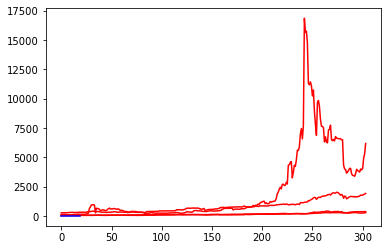

In [128]:
plt.plot(test,color='red',label='Actual Stock Price')
plt.plot(pred,color='blue',label='Predicted Stock Price')

<IPython.core.display.Javascript object>

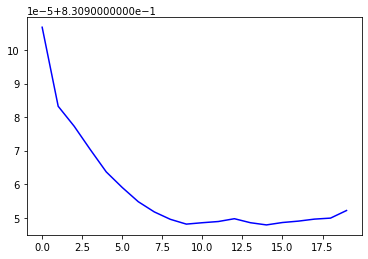

In [129]:
plt.plot(pred,color='blue',label='Predicted Stock Price')